# **Customer Segmentation: Recency, Frequency, and Monetary Value (R,F,M) Analysis**

### Introduction:

Customer segmentation is a crucial analytical technique that allows businesses to categorize their customer base into distinct groups based on specific behaviors and characteristics. One of the most effective methods for segmentation is through **RFM analysis**—an approach that evaluates customers based on **Recency**, **Frequency**, and **Monetary Value**. These three metrics provide valuable insights into customer engagement, purchasing behavior, and overall value to the business.

- **Recency** measures how recently a customer made their last purchase, which helps identify active versus inactive customers.
- **Frequency** counts the number of transactions a customer has made within a certain period, reflecting their engagement level with the business.
- **Monetary Value** assesses the total amount spent by a customer during the analysis period, highlighting their financial contribution to the company.

By using RFM analysis, businesses can develop targeted marketing strategies, prioritize high-value customers, and create personalized engagement initiatives to drive loyalty and maximize revenue. This segmentation helps to identify the most valuable customers, re-engage those who are at risk of churning, and optimize resource allocation for customer acquisition and retention.

In this project, we will explore how **Recency, Frequency, and Monetary Value** can be used to group customers into different segments, such as **Gold**, **Silver**, and **Bronze**, and also as **Best Customers**, **lost cheap customers**, **almost lost customers**, and **lost customers**, allowing for data-driven decision-making that aligns with business objectives. Through this analysis, we aim to uncover actionable insights that can be used to enhance customer relationships and drive business growth.

## 1. Importing Libraries and Loading data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np

online = pd.read_csv('online_retail.csv')
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom
1,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom
2,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom
3,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,2011-11-16 10:39:00,1.95,17198.0,United Kingdom
4,546157,22180,RETROSPOT LAMP,2,2011-03-10 08:40:00,9.95,13502.0,United Kingdom


**Shape of the dataset**

In [ ]:
online.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


**Changing datatype of InvoiceDate**

In [ ]:
online['InvoiceDate'] = pd.to_datetime(online['InvoiceDate'], errors='coerce')

In [ ]:
online.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


## 2. Cohort Analysis
**Assign acquisition month cohort**

In [ ]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom
1,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom
2,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom
3,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,2011-11-16 10:39:00,1.95,17198.0,United Kingdom
4,546157,22180,RETROSPOT LAMP,2,2011-03-10 08:40:00,9.95,13502.0,United Kingdom


In [ ]:
import datetime as dt
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month)
grouping = online.groupby('CustomerID')['InvoiceMonth']
online['CohortMonth'] = online.groupby('CustomerID')['InvoiceMonth'].transform('min')
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom,2011-06-01,2010-12-01
1,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom,2011-05-01,2010-12-01
2,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom,2011-04-01,2010-12-01
3,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,2011-11-16 10:39:00,1.95,17198.0,United Kingdom,2011-11-01,2010-12-01
4,546157,22180,RETROSPOT LAMP,2,2011-03-10 08:40:00,9.95,13502.0,United Kingdom,2011-03-01,2011-01-01


### **Calculate time offset**
Calculating time offset for each transaction allows you to report the metrics for each cohort in a comparable fashion.

**Define function to extract `year`, `month`, and `day`**

In [ ]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

**Assign time offset value**

In [ ]:
invoice_year, invoice_month, _ = get_date_int(online, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(online, 'CohortMonth')
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
online['CohortIndex'] = years_diff * 12 + months_diff + 1
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom,2011-06-01,2010-12-01,7.0
1,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom,2011-05-01,2010-12-01,6.0
2,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom,2011-04-01,2010-12-01,5.0
3,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,2011-11-16 10:39:00,1.95,17198.0,United Kingdom,2011-11-01,2010-12-01,12.0
4,546157,22180,RETROSPOT LAMP,2,2011-03-10 08:40:00,9.95,13502.0,United Kingdom,2011-03-01,2011-01-01,3.0


In [ ]:
online.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object
InvoiceMonth,datetime64[ns]
CohortMonth,datetime64[ns]


### **Count monthly active customers from each cohort**

In [ ]:
grouping = online.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index = 'CohortMonth',
                                   columns = 'CohortIndex',
                                   values = 'CustomerID')
print(cohort_counts)

CohortIndex   1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0   \
CohortMonth                                                                  
2010-12-01   812.0  289.0  249.0  289.0  270.0  313.0  281.0  274.0  274.0   
2011-01-01   410.0   84.0  109.0   93.0  127.0  112.0  101.0   90.0  121.0   
2011-02-01   352.0   68.0   65.0  101.0   86.0   84.0   85.0   88.0   89.0   
2011-03-01   417.0   68.0  101.0   79.0   86.0   76.0  105.0  100.0  110.0   
2011-04-01   289.0   63.0   58.0   53.0   51.0   63.0   61.0   69.0   18.0   
2011-05-01   256.0   47.0   44.0   37.0   54.0   58.0   65.0   26.0    NaN   
2011-06-01   239.0   40.0   35.0   56.0   55.0   79.0   26.0    NaN    NaN   
2011-07-01   181.0   31.0   35.0   40.0   42.0   18.0    NaN    NaN    NaN   
2011-08-01   155.0   26.0   36.0   34.0   17.0    NaN    NaN    NaN    NaN   
2011-09-01   296.0   67.0   89.0   36.0    NaN    NaN    NaN    NaN    NaN   
2011-10-01   349.0   77.0   36.0    NaN    NaN    NaN    NaN    

## 3. Cohort Metrics

### Customer Retention: A very useful metric to understand how many of all the customers are still active.
- How many customers originally in each cohort?
- How many of them were active in following months?

In [ ]:
cohort_counts

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,812.0,289.0,249.0,289.0,270.0,313.0,281.0,274.0,274.0,308.0,298.0,391.0,208.0
2011-01-01,410.0,84.0,109.0,93.0,127.0,112.0,101.0,90.0,121.0,131.0,152.0,54.0,NaN
2011-02-01,352.0,68.0,65.0,101.0,86.0,84.0,85.0,88.0,89.0,112.0,25.0,NaN,NaN
2011-03-01,417.0,68.0,101.0,79.0,86.0,76.0,105.0,100.0,110.0,35.0,NaN,NaN,NaN
2011-04-01,289.0,63.0,58.0,53.0,51.0,63.0,61.0,69.0,18.0,NaN,NaN,NaN,NaN
2011-05-01,256.0,47.0,44.0,37.0,54.0,58.0,65.0,26.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,239.0,40.0,35.0,56.0,55.0,79.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,181.0,31.0,35.0,40.0,42.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,155.0,26.0,36.0,34.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The retention measures how many customers from each of the cohorts have returned in the subsequent months (retention rate).

You will see the first month's retention - by definition - will be 100% for all cohorts. This is because the number of active customers in the first month is actually the size of the cohort.

Retention gives you the percentage of active customers compared to the total number of customers.

**Calculate Retention Rate**

In [ ]:
# Store the first column as cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

In [ ]:
cohort_sizes

,1.0
CohortMonth,
2010-12-01,812.0
2011-01-01,410.0
2011-02-01,352.0
2011-03-01,417.0
2011-04-01,289.0
2011-05-01,256.0
2011-06-01,239.0
2011-07-01,181.0
2011-08-01,155.0


In [ ]:
# Divide all the values in cohort_counts table by cohort_sizes
retention = cohort_counts.divide(cohort_sizes, axis=0)

In [ ]:
retention

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.355911,0.306650,0.355911,0.332512,0.385468,0.346059,0.337438,0.337438,0.379310,0.366995,0.481527,0.256158
2011-01-01,1.0,0.204878,0.265854,0.226829,0.309756,0.273171,0.246341,0.219512,0.295122,0.319512,0.370732,0.131707,NaN
2011-02-01,1.0,0.193182,0.184659,0.286932,0.244318,0.238636,0.241477,0.250000,0.252841,0.318182,0.071023,NaN,NaN
2011-03-01,1.0,0.163070,0.242206,0.189448,0.206235,0.182254,0.251799,0.239808,0.263789,0.083933,NaN,NaN,NaN
2011-04-01,1.0,0.217993,0.200692,0.183391,0.176471,0.217993,0.211073,0.238754,0.062284,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.183594,0.171875,0.144531,0.210938,0.226562,0.253906,0.101562,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.167364,0.146444,0.234310,0.230126,0.330544,0.108787,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.171271,0.193370,0.220994,0.232044,0.099448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.167742,0.232258,0.219355,0.109677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
retention.round(3)*100

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,35.6,30.7,35.6,33.3,38.5,34.6,33.7,33.7,37.9,36.7,48.2,25.6
2011-01-01,100.0,20.5,26.6,22.7,31.0,27.3,24.6,22.0,29.5,32.0,37.1,13.2,NaN
2011-02-01,100.0,19.3,18.5,28.7,24.4,23.9,24.1,25.0,25.3,31.8,7.1,NaN,NaN
2011-03-01,100.0,16.3,24.2,18.9,20.6,18.2,25.2,24.0,26.4,8.4,NaN,NaN,NaN
2011-04-01,100.0,21.8,20.1,18.3,17.6,21.8,21.1,23.9,6.2,NaN,NaN,NaN,NaN
2011-05-01,100.0,18.4,17.2,14.5,21.1,22.7,25.4,10.2,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,16.7,14.6,23.4,23.0,33.1,10.9,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,17.1,19.3,22.1,23.2,9.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,16.8,23.2,21.9,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Why NaNs? Because as the more recent cohorts had less time to be active.**

## 4. Visualizing Cohort Analysis

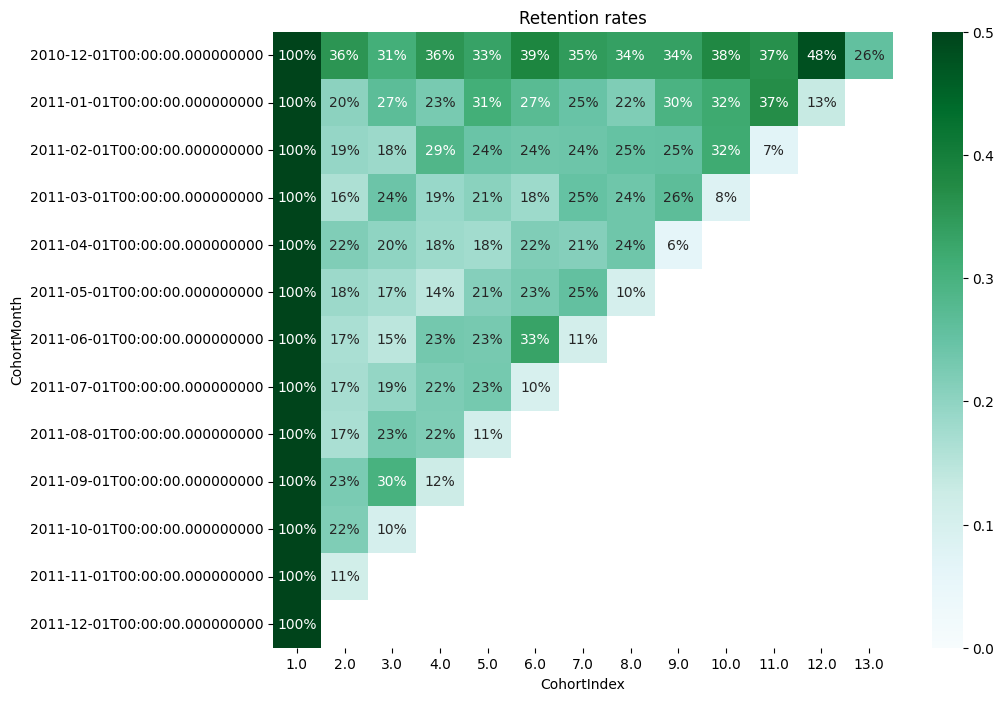

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.title('Retention rates')
sns.heatmap(data = retention,
            annot = True,
            fmt = '.0%',
            vmin = 0.0,
            vmax = 0.5,
            cmap = 'BuGn')

plt.show()

The heatmap shows retention trends for different customer cohorts and provides a clear way to identify strong or weak retention periods over time.

Key insights you can infer from the heatmap:

**1. Customer Retention Over Time:** The retention rate generally decreases as time (cohort index) progresses, which is common as customers tend to drop off after initial engagement. Darker green shades indicate higher retention, while lighter shades suggest a lower retention rate.

**2. Best Performing Cohorts:** Certain months (e.g., 2010-12, 2011-09) have higher retention rates over time compared to others. These cohorts could represent times when marketing efforts, product offerings, or seasonality led to better customer retention.




## 5. Calculate RFM metrics

- Recency - days since last customer transaction
- Frequency - number of transactions in the last 12 months
- Monetary Value - total spend in the last 12 months

In [ ]:
online['TotalSum'] = online['Quantity'] * online['UnitPrice']

In [ ]:
print('Min:{}; Max:{}'.format(min(online.InvoiceDate),
                              max(online.InvoiceDate)))

Min:2010-12-01 08:26:00; Max:2011-12-09 12:50:00


In [ ]:
#create a hypothetical snapshot_day data as if we're doing analysis recently.
snapshot_date = max(online.InvoiceDate) + dt.timedelta(days=1)
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [ ]:
# Aggregate data on a customer level
datamart = online.groupby(['CustomerID']).agg({
    'InvoiceDate':lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})

# Rename columns for easier interpretation
datamart.rename(columns = {'InvoiceDate':'Recency',
                           'InvoiceNo':'Frequency',
                           'TotalSum': 'MonetaryValue'}, inplace=True)

datamart.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,31,656.78
12348.0,319,5,443.52
12349.0,19,16,598.01
12350.0,310,2,42.90


## 6. Building RFM Segments

Calculating quartile value for each column and name them as R, F, M.

In [ ]:
# Recency quartile
r_labels = range(4, 0, -1)
r_quartiles = pd.qcut(datamart['Recency'], 4, labels = r_labels)
datamart = datamart.assign(R = r_quartiles.values)

In [ ]:
datamart.head()

,Recency,Frequency,MonetaryValue,R
CustomerID,,,,
12346.0,326,1,77183.60,1
12347.0,2,31,656.78,4
12348.0,319,5,443.52,1
12349.0,19,16,598.01,3
12350.0,310,2,42.90,1


In [ ]:
# Frequency and monetary quartiles
f_labels = range(1, 5)
m_labels = range(1, 5)
f_quartiles = pd.qcut(datamart['Frequency'], 4, labels = f_labels)
m_quartiles = pd.qcut(datamart['MonetaryValue'], 4, labels = m_labels)
datamart = datamart.assign(F = f_quartiles.values)
datamart = datamart.assign(M = m_quartiles.values)

In [ ]:
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.60,1,1,4
12347.0,2,31,656.78,4,4,4
12348.0,319,5,443.52,1,2,4
12349.0,19,16,598.01,3,3,4
12350.0,310,2,42.90,1,1,1


### **Build RFM segment and RFM score**

In [ ]:
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
datamart['RFM_Segment'] = datamart.apply(join_rfm, axis=1)
datamart['RFM_Score'] = datamart[['R', 'F','M']].sum(axis=1)
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,1.01.04.0,6
12347.0,2,31,656.78,4,4,4,4.04.04.0,12
12348.0,319,5,443.52,1,2,4,1.02.04.0,7
12349.0,19,16,598.01,3,3,4,3.03.04.0,10
12350.0,310,2,42.90,1,1,1,1.01.01.0,3


In [ ]:
datamart.dtypes

,0
Recency,int64
Frequency,int64
MonetaryValue,float64
R,category
F,category
M,category
RFM_Segment,object
RFM_Score,int64


In [ ]:
# Modify the function to ensure R, F, and M are integers
def join_rfm(x):
    return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))

# Apply the function to create the RFM_Segment
datamart['RFM_Segment'] = datamart.apply(join_rfm, axis=1)

# Calculate the RFM score as before
datamart['RFM_Score'] = datamart[['R', 'F', 'M']].sum(axis=1)

datamart.head()


,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6
12347.0,2,31,656.78,4,4,4,444,12
12348.0,319,5,443.52,1,2,4,124,7
12349.0,19,16,598.01,3,3,4,334,10
12350.0,310,2,42.90,1,1,1,111,3


## 7. Analyzing RFM segments
**Largest RFM segments**

In [ ]:
datamart.groupby('RFM_Segment').size().sort_values(ascending=False)[:10]

,0
RFM_Segment,
444,412
111,388
344,204
211,202
333,155
112,145
233,144
222,142
433,137


**Calculate average recency, frequency, and monetary value, and then count of customers in each group.**

In [ ]:
# Summary metrics per RFM score
datamart.groupby('RFM_Score').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean','count']}).round(1)


Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           261.9       2.1          21.7   388
4           175.0       3.1          39.5   408
5           144.3       4.5          75.3   439
6           107.7       6.4         -62.1   445
7            84.7       9.0         160.7   447
8            64.5      12.6         207.1   427
9            48.6      17.3         296.1   386
10           33.6      25.1         427.8   397
11           21.3      39.8         838.8   370
12            7.3      81.7        1916.2   412

**General Observations:**

- Recency decreases as the RFM score increases**: Customers with higher RFM scores (e.g., 12) have made more recent purchases (lower Recency), while those with lower scores (e.g., 3) haven't made purchases in a while (higher Recency values).

- Frequency increases with RFM score**: Customers with higher scores (e.g., 12) tend to make significantly more purchases than those with lower scores. For example, customers with an RFM score of 3 made an average of 2.1 purchases, while those with a score of 12 made an average of 81.7 purchases.

- Monetary Value generally increases with the RFM score**: Customers with higher scores spend significantly more. Customers with an RFM score of 12 have spent an average of 1,916.2, while those with a score of 3 spent only 21.7 on average.

**Key Insights:**
1. High-Value Customers (RFM score 12):

- These customers make frequent purchases (81.7 on average) and have a low Recency score (they’ve purchased very recently).
- They also generate a significant amount of revenue (1,916.2), making them the most valuable segment.
- This group is highly engaged and should be prioritized for retention and reward programs.


2. Engaged Customers (RFM scores 10 and 11):

- These customers also have a low Recency score (21.3–33.6), meaning they purchase regularly.
- They have high Frequency (25.1–39.8 purchases on average) and spend a lot (427.8–838.8).
- These customers are loyal and valuable, and businesses should continue efforts to keep them engaged.

3. At-Risk Customers (RFM scores 6 and 7):

- These customers have moderate Recency scores (107.7–84.7), meaning it’s been a while since their last purchase.
- They still have moderate to high Frequency (6.4–9.0 purchases on average), indicating they are repeat customers.
- Interestingly, the Monetary Value for score 6 is negative (-62.1), which could be due to returns or discounts, while score 7 customers have a positive value (160.7).
- This segment might be at risk of churn, especially if their recency continues to increase. They could benefit from re-engagement campaigns or incentives.

4. Low-Value or Inactive Customers (RFM scores 3 to 5):

- These customers have high Recency scores (144.3–261.9), indicating they haven't made recent purchases.
- They make very few purchases (2.1–4.5 on average) and spend significantly less (21.7–75.3).
- These customers are either new or inactive and may require targeted marketing to increase engagement, such as special offers or discounts.

In [ ]:
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6
12347.0,2,31,656.78,4,4,4,444,12
12348.0,319,5,443.52,1,2,4,124,7
12349.0,19,16,598.01,3,3,4,334,10
12350.0,310,2,42.90,1,1,1,111,3


## 8. Using RFM score to group customers into GOLD, SILVER, and BRONZE segments

In [ ]:
def segment_me(df):
  if df['RFM_Score'] >= 9:
    return 'Gold'
  elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
    return 'Silver'
  else:
    return 'Bronze'

datamart['General_Segment'] = datamart.apply(segment_me, axis=1)

In [ ]:
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6,Silver
12347.0,2,31,656.78,4,4,4,444,12,Gold
12348.0,319,5,443.52,1,2,4,124,7,Silver
12349.0,19,16,598.01,3,3,4,334,10,Gold
12350.0,310,2,42.90,1,1,1,111,3,Bronze


In [ ]:
datamart.groupby('General_Segment').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean','count']}).round(1)


Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Bronze            217.3       2.6          30.9   796
Gold               27.5      41.5         884.3  1565
Silver            100.5       8.1          94.3  1758

**Key Insights:**

1. Gold Segment:

- These are highly engaged, loyal customers who make frequent and recent purchases, contributing significantly to revenue.
- The fact that they have a very low Recency score (27.5) shows that they are actively buying.
- Retention should be a top priority for this group, as losing these customers could have a substantial impact on revenue. Loyalty programs, exclusive offers, and personalized experiences are strategies that could further strengthen their engagement.

2. Silver Segment:

- This group makes occasional purchases and generates moderate revenue. They represent the middle tier of customers and have potential for growth.
- Moderate Recency (100.5) indicates they have not purchased very recently, but they are still active buyers.
- Focus on re-engagement strategies such as targeted promotions or upselling could move them into the Gold tier, enhancing their lifetime value.

3. Bronze Segment:

- These are low-value or inactive customers who haven’t purchased recently and make infrequent purchases. They contribute the least in terms of revenue.
- With a high Recency score (217.3), they are at risk of being lost entirely unless reactivated.
- This group would benefit from reactivation campaigns like win-back offers, discounts, or targeted marketing aimed at re-engaging them.

**Strategic Implications:**

- Gold Segment (41.5 average transactions, $884.3 spend) represents the core of the business’s revenue and should be prioritized for retention and engagement strategies. This segment contributes the most financially and is highly engaged with the brand.

- Silver Segment (8.1 average transactions, $94.3 spend) presents growth potential. Efforts to increase their purchase frequency and spending could potentially upgrade them to the Gold tier. They are a large group, so improving their engagement can have a significant cumulative effect on revenue.

- Bronze Segment (2.6 average transactions, $30.9 spend) represents at-risk or low-engagement customers. These customers require a different strategy, focusing on re-engagement and trying to bring them back into regular purchasing habits.

**What is the average MonetaryValue for the segment with RFM_Score of 9 (nine)?**

In [ ]:
# Filter the data where RFM_Score is equal to 9
rfm_score_9 = datamart[datamart['RFM_Score'] == 9]

# Calculate the mean MonetaryValue for this segment
mean_monetary_value_9 = rfm_score_9['MonetaryValue'].mean()

print(mean_monetary_value_9)


296.1128005181347


## 9. Exploring distribution of recency and frequency

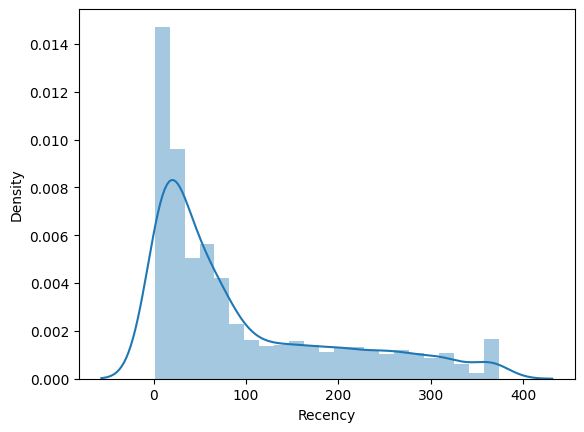

In [ ]:
sns.distplot(datamart['Recency'])
plt.show()

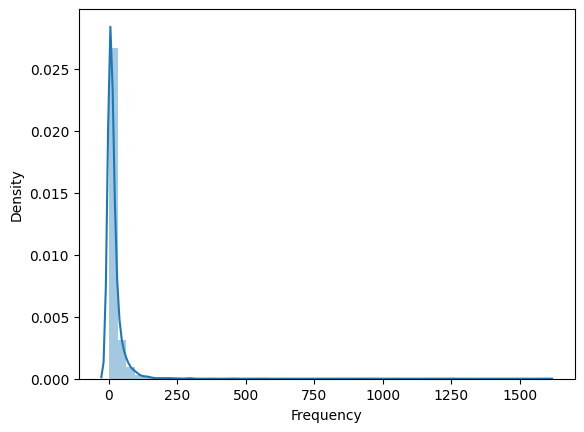

In [ ]:
sns.distplot(datamart['Frequency'])
plt.show()

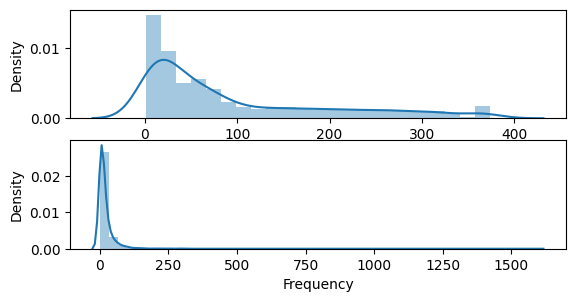

In [ ]:
# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(datamart['Recency'])

# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(datamart['Frequency'])

# Show the plot
plt.show()

### Manage Skewness

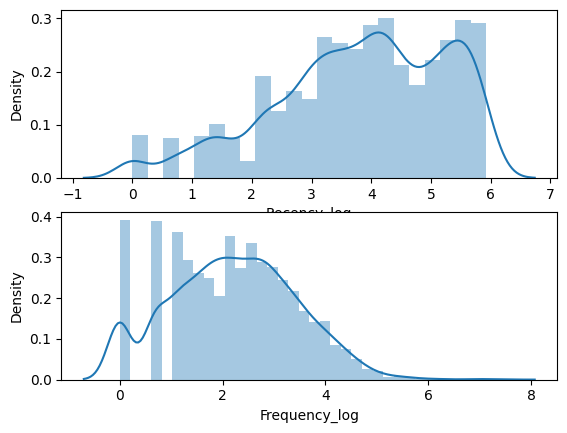

In [ ]:
# Apply log transformation to var2
datamart['Recency_log'] = np.log(datamart['Recency'])

# Apply log transformation to var3
datamart['Frequency_log'] = np.log(datamart['Frequency'])

# Create a subplot of the distribution of var2_log
plt.subplot(2, 1, 1); sns.distplot(datamart['Recency_log'])

# Create a subplot of the distribution of var3_log
plt.subplot(2, 1, 2); sns.distplot(datamart['Frequency_log'])

# Show the plot
plt.show()

In [ ]:
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment,Recency_log,Frequency_log
CustomerID,,,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6,Silver,5.786897,0.000000
12347.0,2,31,656.78,4,4,4,444,12,Gold,0.693147,3.433987
12348.0,319,5,443.52,1,2,4,124,7,Silver,5.765191,1.609438
12349.0,19,16,598.01,3,3,4,334,10,Gold,2.944439,2.772589
12350.0,310,2,42.90,1,1,1,111,3,Bronze,5.736572,0.693147


In [ ]:
datamart1 = datamart.copy()

In [ ]:
datamart1.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment,Recency_log,Frequency_log
CustomerID,,,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6,Silver,5.786897,0.000000
12347.0,2,31,656.78,4,4,4,444,12,Gold,0.693147,3.433987
12348.0,319,5,443.52,1,2,4,124,7,Silver,5.765191,1.609438
12349.0,19,16,598.01,3,3,4,334,10,Gold,2.944439,2.772589
12350.0,310,2,42.90,1,1,1,111,3,Bronze,5.736572,0.693147


## 10. Customer Segments Distribution (RFM)

In [ ]:
# Initialize a 'segment' list with the same length as datamart
segment = [0] * len(datamart1)

# Lists of customer segments based on RFM_Segment values
best = list(datamart1.loc[datamart1['RFM_Segment'] == '444'].index)
lost_cheap = list(datamart1.loc[datamart1['RFM_Segment'] == '111'].index)
lost = list(datamart1.loc[datamart1['RFM_Segment'] == '133'].index)
lost_almost = list(datamart1.loc[datamart1['RFM_Segment'] == '233'].index)

# Loop through the DataFrame by index
for i in range(0, len(datamart)):
    # Using .iloc[i] for row access by position
    if datamart1.iloc[i]['RFM_Segment'] == '111':
        segment[i] = 'Lost Cheap Customers'
    elif datamart1.iloc[i]['RFM_Segment'] == '133':
        segment[i] = 'Lost Customers'
    elif datamart1.iloc[i]['RFM_Segment'] == '233':
        segment[i] = 'Almost Lost Customers'
    elif datamart1.iloc[i]['RFM_Segment'] == '444':
        segment[i] = 'Best Customers'
    else:
        segment[i] = 'Others'

# Add the 'segment' list as a new column to the datamart DataFrame
datamart1['segment'] = segment

# Display the updated dataframe
datamart1.head()


,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment,Recency_log,Frequency_log,segment
0,12346.0,326,1,77183.60,1,1,4,114,6,Silver,5.786897,0.000000,Others
1,12347.0,2,31,656.78,4,4,4,444,12,Gold,0.693147,3.433987,Best Customers
2,12348.0,319,5,443.52,1,2,4,124,7,Silver,5.765191,1.609438,Others
3,12349.0,19,16,598.01,3,3,4,334,10,Gold,2.944439,2.772589,Others
4,12350.0,310,2,42.90,1,1,1,111,3,Bronze,5.736572,0.693147,Lost Cheap Customers


In [ ]:
# Reset index if CustomerID is the index
datamart1 = datamart1.reset_index()

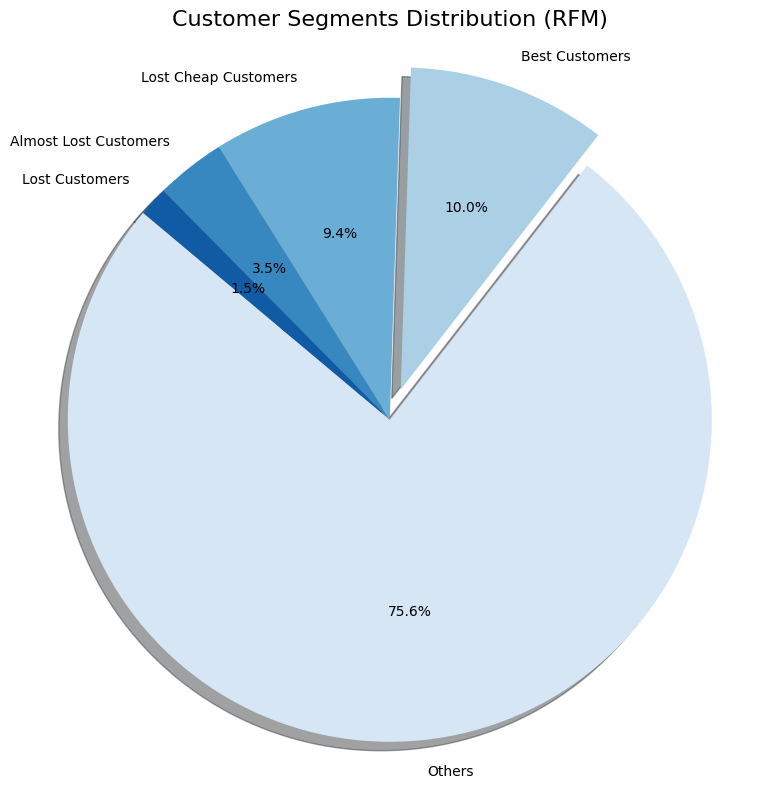

In [ ]:
segment_counts = datamart1.groupby('segment')['CustomerID'].nunique().reset_index()
segment_counts = segment_counts.sort_values(by='CustomerID', ascending=False)

# Plot
plt.figure(figsize=(8, 8))

colors = sns.color_palette("Blues", len(segment_counts))
explode = [0.1 if x == 'Best Customers' else 0 for x in segment_counts['segment']]

# Create a pie chart
plt.pie(segment_counts['CustomerID'], labels=segment_counts['segment'], autopct='%1.1f%%',
        startangle=140, colors=colors, explode=explode, shadow=True)

plt.title('Customer Segments Distribution (RFM)', fontsize=16)

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')
plt.tight_layout()
plt.show()


**Recommendations:**

Based on the above R-F-M score, we can give some Recommendations.

- Best Customers: We can Reward them for their multiples purchases. They can be early adopters to very new products. Suggest them “Refer a friend”. Also, they can be the most loyal customers that have the habit to order.

- Lost Cheap Customers: Send them personalized emails/messages/notifications to encourage them to order.

- Big Spenders: Notify them about the discounts to keep them spending more and more money on your products

- Loyal Customers: Create loyalty cards in which they can gain points each time of purchasing and these points could transfer into a discount

This is how we can target a customer based on the customer segmentation which will help in marketing campaigns. Thus saving marketing costs, grab the customer, make customers spend more thereby increasing the revenue

In [ ]:
#############################################End-of-Code#########################################################